In [122]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [123]:
with open(r"C:\Users\hi020\Desktop\play\sample_train1\annotations.json") as f:
    data = json.load(f)

In [124]:
num = 799

In [125]:
data[num]['models']

[{'span': 0.6712472867360736,
  'name': 'Aqua',
  'label': 'Aqua',
  'start': 0,
  'bbox': {'y': 142, 'x': 209, 'w': 114, 'h': 71},
  'end': 0.6712472867360736},
 {'span': 0.22266648370029268,
  'name': 'Forest Green',
  'label': 'Forest Green',
  'start': 0.6712472867360736,
  'bbox': {'y': 124, 'x': 209, 'w': 89, 'h': 89},
  'end': 0.8939137704363662},
 {'span': 3.82236632238313,
  'name': 'Cyan',
  'label': 'Cyan',
  'start': 0.8939137704363662,
  'bbox': {'y': 98.89756944444446,
   'x': 95.88194444444446,
   'w': 227.2048611111111,
   'h': 227.2048611111111},
  'end': 4.716280092819496},
 {'span': 1.5669052143600897,
  'name': 'Light Slate',
  'label': 'Light Slate',
  'start': 4.716280092819496,
  'bbox': {'y': 213, 'x': 209, 'w': 114, 'h': 113},
  'end': 6.283185307179586}]

In [126]:
bbox_list = []

def yxwh(x, bbox_list):
    if x:
        if type(x) == list:
            for _x in x:
                if type(_x) == dict:
                    a = _x.keys()
                    for i in a:
                        if i == 'bboxes':
                            bbox_list += _x[i]
                        elif i == 'bbox':
                            bbox_list.append(_x[i])
                        else:
                            yxwh(_x[i], bbox_list)
        elif type(x) == dict:
            a = x.keys()
            for i in a:
                if i == 'bboxes':
                    bbox_list += x[i]
                elif i == 'bbox':
                    if list(x[i].keys()) == ['bbox']:
                        bbox_list.append(x[i]['bbox'])
                    else:
                        bbox_list.append(x[i])
                else:
                    yxwh(x[i], bbox_list)
yxwh(data[num]['models'], bbox_list)

In [127]:
bbox_list

[{'y': 142, 'x': 209, 'w': 114, 'h': 71},
 {'y': 124, 'x': 209, 'w': 89, 'h': 89},
 {'y': 98.89756944444446,
  'x': 95.88194444444446,
  'w': 227.2048611111111,
  'h': 227.2048611111111},
 {'y': 213, 'x': 209, 'w': 114, 'h': 113}]

In [128]:
data[num]['models']

[{'span': 0.6712472867360736,
  'name': 'Aqua',
  'label': 'Aqua',
  'start': 0,
  'bbox': {'y': 142, 'x': 209, 'w': 114, 'h': 71},
  'end': 0.6712472867360736},
 {'span': 0.22266648370029268,
  'name': 'Forest Green',
  'label': 'Forest Green',
  'start': 0.6712472867360736,
  'bbox': {'y': 124, 'x': 209, 'w': 89, 'h': 89},
  'end': 0.8939137704363662},
 {'span': 3.82236632238313,
  'name': 'Cyan',
  'label': 'Cyan',
  'start': 0.8939137704363662,
  'bbox': {'y': 98.89756944444446,
   'x': 95.88194444444446,
   'w': 227.2048611111111,
   'h': 227.2048611111111},
  'end': 4.716280092819496},
 {'span': 1.5669052143600897,
  'name': 'Light Slate',
  'label': 'Light Slate',
  'start': 4.716280092819496,
  'bbox': {'y': 213, 'x': 209, 'w': 114, 'h': 113},
  'end': 6.283185307179586}]

data[num]['general_figure_info']['y_axis']['minor_ticks']['bboxes']

In [129]:
points = []

# 바운딩 박스의 좌측 하단과 우측 상단 꼭지점을 points 리스트에 추가합니다.
for bbox in bbox_list:
    x = bbox['x']
    y = bbox['y']
    w = bbox['w']
    h = bbox['h']
    #print(x,y,w,h)
    # 좌측 하단 점
    point1 = (x, y)
    # 우측 상단 점
    point2 = (x + w, y +h)
    
    points.append((point1, point2))
   
# 보조눈금의 y 좌표에 해당하는 중심점을 points 리스트에 추가합니다.
for bbox in data[num]['general_figure_info']['x_axis']['major_labels']['bboxes']:
    x = bbox['x']
    y = bbox['y']
    w = bbox['w']
    h = bbox['h']
    print(bbox['x']+bbox['w']/2,",",bbox['y']+bbox['h']/2)

    # 바운딩 박스의 중심에 해당하는 y 좌표를 계산합니다.
    center_y = (x + w / 2, y + h / 2)
    #print(center_y)
    
    # 각 바운딩 박스의 좌측 하단과 우측 상단 꼭지점과 보조눈금의 y 좌표에 해당하는 중심점을 모두 추가합니다.
    points.append((point1, point2, center_y))


KeyError: 'x_axis'

In [ ]:
fig_type = data[num].get('type', 'unknown')

In [ ]:
fig_type

'line'

In [ ]:
def get_graph_type(data):
    if 'models' in data and isinstance(data['models'], list) and len(data['models']) > 0:
        first_model = data['models'][0]
        if 'name' in first_model:
            return first_model['name']
    return None

graph_type = get_graph_type(data[num])
print("Graph Type:", graph_type)

Graph Type: Gray


In [ ]:
center_y

(461.4765625, 368.0)

In [ ]:
xl = data[num]['general_figure_info']['x_axis']['major_labels']['bboxes']

In [ ]:
yt = data[num]['general_figure_info']['y_axis']['major_ticks']['bboxes']

In [ ]:
yl = data[num]['general_figure_info']['y_axis']['major_labels']['bboxes']

In [ ]:
xt = data[num]['general_figure_info']['x_axis']['major_ticks']['bboxes']

In [ ]:
bbox_list

[{'y': 46, 'x': 69, 'w': 30, 'h': 20},
 {'y': 66, 'x': 99, 'w': 30, 'h': 20},
 {'y': 86, 'x': 129, 'w': 30, 'h': 21},
 {'y': 107, 'x': 159, 'w': 31, 'h': 20},
 {'y': 127, 'x': 190, 'w': 30, 'h': 20},
 {'y': 147, 'x': 220, 'w': 30, 'h': 21},
 {'y': 168, 'x': 250, 'w': 30, 'h': 20},
 {'y': 188, 'x': 280, 'w': 30, 'h': 21},
 {'y': 209, 'x': 310, 'w': 31, 'h': 20},
 {'y': 229, 'x': 341, 'w': 30, 'h': 20},
 {'y': 249, 'x': 371, 'w': 30, 'h': 21},
 {'y': 270, 'x': 401, 'w': 30, 'h': 20},
 {'y': 290, 'x': 431, 'w': 30, 'h': 20},
 {'y': 46, 'x': 69, 'w': 30, 'h': 20},
 {'y': 66, 'x': 99, 'w': 30, 'h': 20},
 {'y': 86, 'x': 129, 'w': 30, 'h': 21},
 {'y': 107, 'x': 159, 'w': 31, 'h': 20},
 {'y': 127, 'x': 190, 'w': 30, 'h': 21},
 {'y': 148, 'x': 220, 'w': 30, 'h': 20},
 {'y': 168, 'x': 250, 'w': 30, 'h': 21},
 {'y': 189, 'x': 280, 'w': 30, 'h': 20},
 {'y': 209, 'x': 310, 'w': 31, 'h': 21},
 {'y': 230, 'x': 341, 'w': 30, 'h': 20},
 {'y': 250, 'x': 371, 'w': 30, 'h': 21},
 {'y': 271, 'x': 401, 'w':

In [ ]:
xl

[{'y': 361, 'x': 66, 'w': 6.984375, 'h': 14},
 {'y': 361, 'x': 140, 'w': 13.96875, 'h': 14},
 {'y': 361, 'x': 219, 'w': 13.96875, 'h': 14},
 {'y': 361, 'x': 297, 'w': 13.96875, 'h': 14},
 {'y': 361, 'x': 376, 'w': 13.96875, 'h': 14},
 {'y': 361, 'x': 451, 'w': 20.953125, 'h': 14},
 {'y': 361, 'x': 66, 'w': 6.984375, 'h': 14},
 {'y': 361, 'x': 140, 'w': 13.96875, 'h': 14},
 {'y': 361, 'x': 219, 'w': 13.96875, 'h': 14},
 {'y': 361, 'x': 297, 'w': 13.96875, 'h': 14},
 {'y': 361, 'x': 376, 'w': 13.96875, 'h': 14},
 {'y': 361, 'x': 451, 'w': 20.953125, 'h': 14}]

In [ ]:
xt

[{'y': 348, 'x': 65, 'w': 8, 'h': 8},
 {'y': 348, 'x': 143, 'w': 8, 'h': 8},
 {'y': 348, 'x': 222, 'w': 8, 'h': 8},
 {'y': 348, 'x': 300, 'w': 8, 'h': 8},
 {'y': 348, 'x': 379, 'w': 8, 'h': 8},
 {'y': 348, 'x': 457, 'w': 8, 'h': 8},
 {'y': 348, 'x': 65, 'w': 8, 'h': 8},
 {'y': 348, 'x': 143, 'w': 8, 'h': 8},
 {'y': 348, 'x': 222, 'w': 8, 'h': 8},
 {'y': 348, 'x': 300, 'w': 8, 'h': 8},
 {'y': 348, 'x': 379, 'w': 8, 'h': 8},
 {'y': 348, 'x': 457, 'w': 8, 'h': 8}]

In [ ]:
yl

[{'y': 305, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 256, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 208, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 159, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 111, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 63, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 305, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 256, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 208, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 159, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 111, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 63, 'x': 24, 'w': 13.96875, 'h': 14}]

In [ ]:
yt

[{'y': 308, 'x': 43, 'w': 8, 'h': 8},
 {'y': 259, 'x': 43, 'w': 8, 'h': 8},
 {'y': 211, 'x': 43, 'w': 8, 'h': 8},
 {'y': 162, 'x': 43, 'w': 8, 'h': 8},
 {'y': 114, 'x': 43, 'w': 8, 'h': 8},
 {'y': 66, 'x': 43, 'w': 8, 'h': 8},
 {'y': 308, 'x': 43, 'w': 8, 'h': 8},
 {'y': 259, 'x': 43, 'w': 8, 'h': 8},
 {'y': 211, 'x': 43, 'w': 8, 'h': 8},
 {'y': 162, 'x': 43, 'w': 8, 'h': 8},
 {'y': 114, 'x': 43, 'w': 8, 'h': 8},
 {'y': 66, 'x': 43, 'w': 8, 'h': 8}]

In [ ]:
print(x+w/2,y+h/2)

461.4765625 368.0


In [ ]:
a = bbox_list

Circle(xy=(69, 46), radius=0.5) Circle(xy=(99, 66), radius=0.5)
Circle(xy=(99, 66), radius=0.5) Circle(xy=(129, 86), radius=0.5)
Circle(xy=(129, 86), radius=0.5) Circle(xy=(159, 107), radius=0.5)
Circle(xy=(159, 107), radius=0.5) Circle(xy=(190, 127), radius=0.5)
Circle(xy=(190, 127), radius=0.5) Circle(xy=(220, 147), radius=0.5)
Circle(xy=(220, 147), radius=0.5) Circle(xy=(250, 168), radius=0.5)
Circle(xy=(250, 168), radius=0.5) Circle(xy=(280, 188), radius=0.5)
Circle(xy=(280, 188), radius=0.5) Circle(xy=(310, 209), radius=0.5)
Circle(xy=(310, 209), radius=0.5) Circle(xy=(341, 229), radius=0.5)
Circle(xy=(341, 229), radius=0.5) Circle(xy=(371, 249), radius=0.5)
Circle(xy=(371, 249), radius=0.5) Circle(xy=(401, 270), radius=0.5)
Circle(xy=(401, 270), radius=0.5) Circle(xy=(431, 290), radius=0.5)


Circle(xy=(431, 290), radius=0.5) Circle(xy=(461, 310), radius=0.5)
Circle(xy=(69, 46), radius=0.5) Circle(xy=(99, 66), radius=0.5)
Circle(xy=(99, 66), radius=0.5) Circle(xy=(129, 86), radius=0.5)
Circle(xy=(129, 86), radius=0.5) Circle(xy=(159, 107), radius=0.5)
Circle(xy=(159, 107), radius=0.5) Circle(xy=(190, 127), radius=0.5)
Circle(xy=(190, 127), radius=0.5) Circle(xy=(220, 148), radius=0.5)
Circle(xy=(220, 148), radius=0.5) Circle(xy=(250, 168), radius=0.5)
Circle(xy=(250, 168), radius=0.5) Circle(xy=(280, 189), radius=0.5)
Circle(xy=(280, 189), radius=0.5) Circle(xy=(310, 209), radius=0.5)
Circle(xy=(310, 209), radius=0.5) Circle(xy=(341, 230), radius=0.5)
Circle(xy=(341, 230), radius=0.5) Circle(xy=(371, 250), radius=0.5)
Circle(xy=(371, 250), radius=0.5) Circle(xy=(401, 271), radius=0.5)
Circle(xy=(401, 271), radius=0.5) Circle(xy=(431, 291), radius=0.5)
Circle(xy=(431, 291), radius=0.5) Circle(xy=(461, 312), radius=0.5)
Circle(xy=(69, 46), radius=0.5) Circle(xy=(99, 53), radi

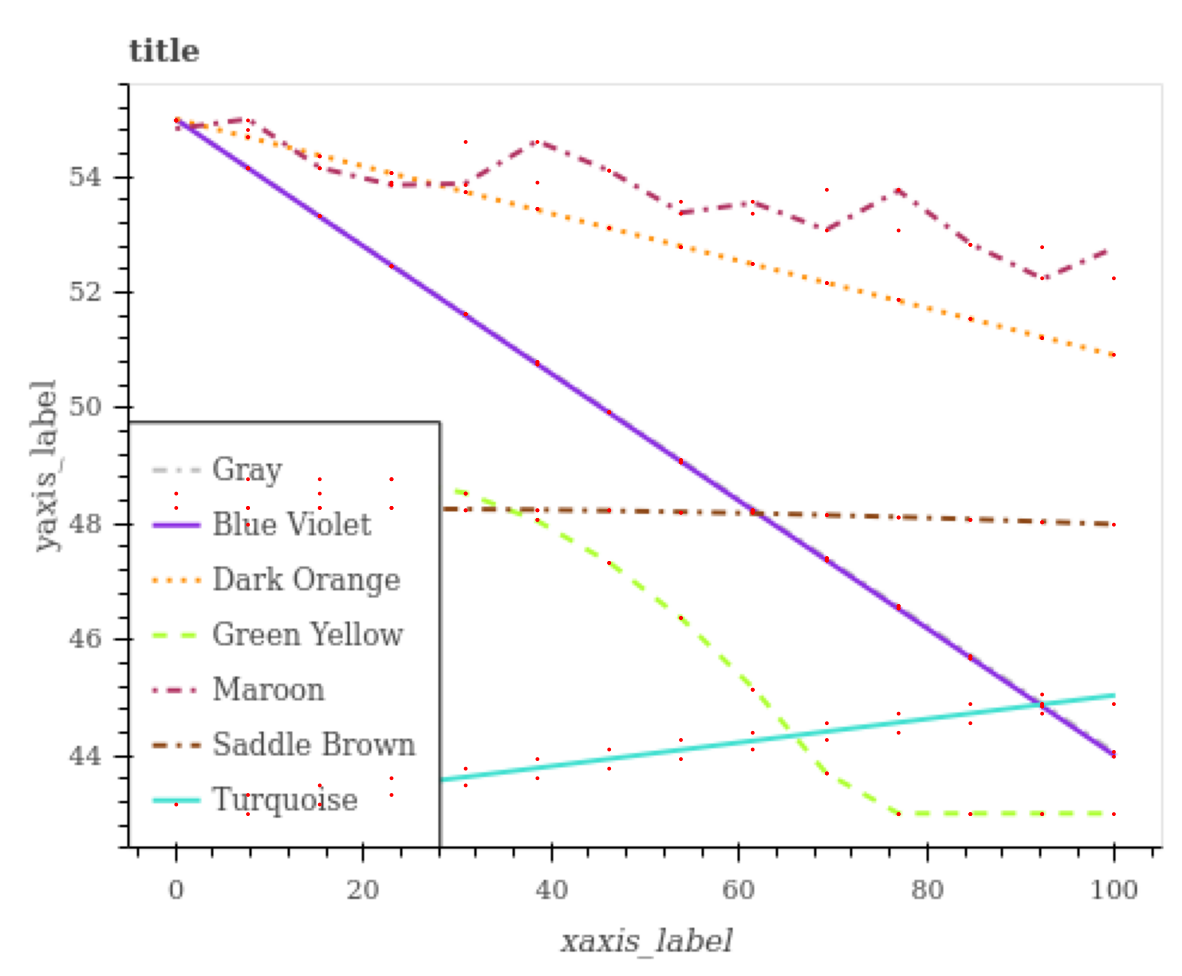

In [ ]:
from matplotlib.patches import Circle

img_lo = r"C:\Users\hi020\Desktop\play\sample_train1\png\{}.png".format(num)

fig, ax = plt.subplots(1, figsize=(15,15))
ax.set_axis_off()
ax.imshow(plt.imread(img_lo))

for i in a:
    circle1 = Circle((i['x'], i['y']), radius=0.5, color='red')
    ax.add_patch(circle1)
    
    # 우측 상단 점을 원으로 표시합니다.
    circle2 = Circle((i['x'] + i['w'], i['y'] + i['h']), radius=0.5, color='red')
    ax.add_patch(circle2)
    print(circle1, circle2)
    
plt.show()

In [ ]:
img_lo = r"C:\Users\hi020\Desktop\play\sample_train1\png\{}.png".format(num)

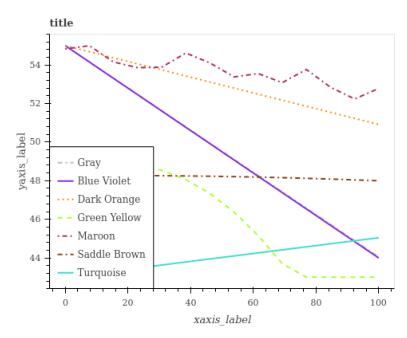

In [ ]:
plt.figure(figsize=(5,5))
plt.gca().set_axis_off()

plt.imshow(plt.imread(img_lo))

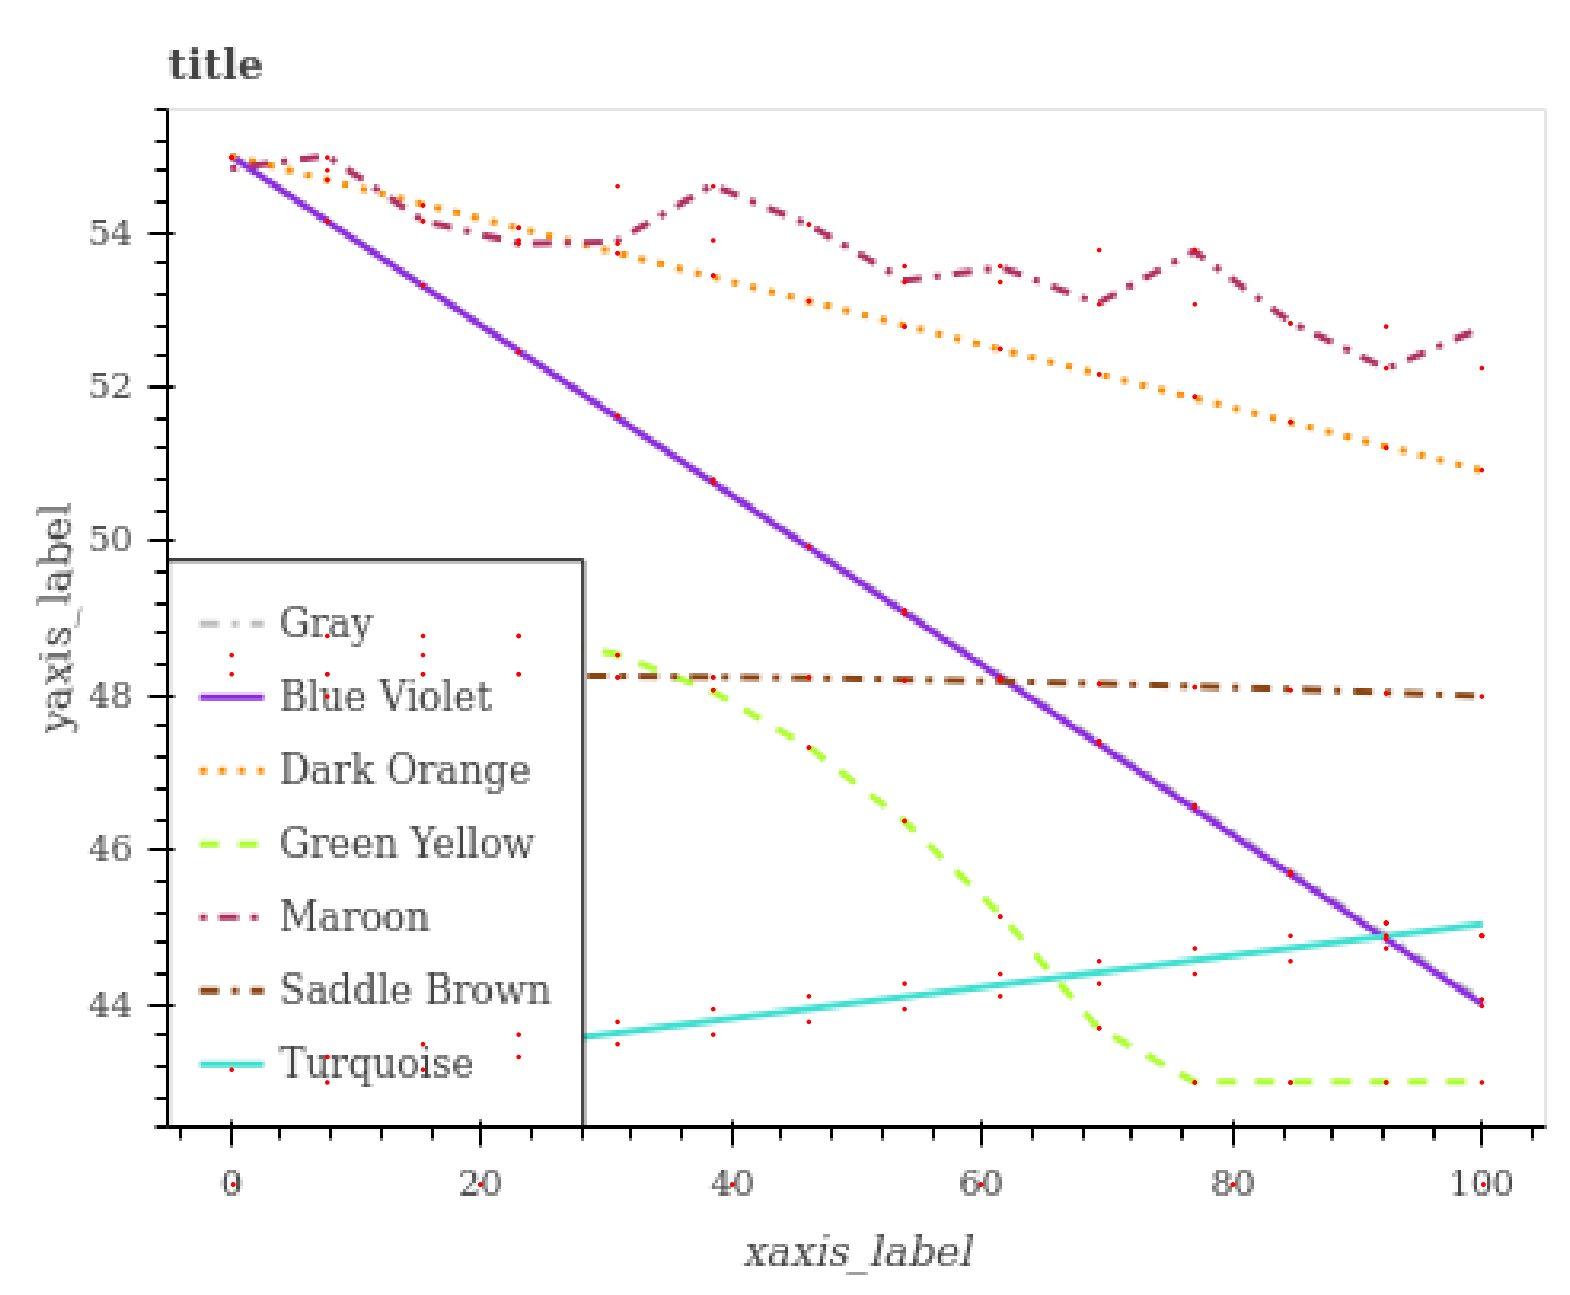

In [ ]:
from matplotlib.patches import Circle

fig, ax = plt.subplots(1, figsize=(20,20))
ax.set_axis_off()
ax.imshow(plt.imread(img_lo))

for points_tuple in points:
    # 좌측 하단 점을 원으로 표시합니다.
    circle1 = Circle(points_tuple[0], radius=0.5, color='red')
    ax.add_patch(circle1)
    
    # 우측 상단 점을 원으로 표시합니다.
    circle2 = Circle(points_tuple[1], radius=0.5, color='red')
    ax.add_patch(circle2)
    
    # 보조눈금의 y 좌표에 해당하는 중심점을 원으로 표시합니다.
    if len(points_tuple) > 2:
        circle3 = Circle(points_tuple[2], radius=0.5, color='red')
        ax.add_patch(circle3)

plt.show()


In [ ]:
def get_graph_type(data):
    if 'models' in data and isinstance(data['models'], list) and len(data['models']) > 0:
        first_model = data['models'][0]
        if 'name' in first_model:
            return first_model['name']
    return None

graph_type = get_graph_type(data[num])
print("Graph Type:", graph_type)


Graph Type: Gray


In [ ]:
data[num]

{'models': [{'name': 'Gray',
   'color': '#BEBEBE',
   'label': 'Gray',
   'bboxes': [{'y': 46, 'x': 69, 'w': 30, 'h': 20},
    {'y': 66, 'x': 99, 'w': 30, 'h': 20},
    {'y': 86, 'x': 129, 'w': 30, 'h': 21},
    {'y': 107, 'x': 159, 'w': 31, 'h': 20},
    {'y': 127, 'x': 190, 'w': 30, 'h': 20},
    {'y': 147, 'x': 220, 'w': 30, 'h': 21},
    {'y': 168, 'x': 250, 'w': 30, 'h': 20},
    {'y': 188, 'x': 280, 'w': 30, 'h': 21},
    {'y': 209, 'x': 310, 'w': 31, 'h': 20},
    {'y': 229, 'x': 341, 'w': 30, 'h': 20},
    {'y': 249, 'x': 371, 'w': 30, 'h': 21},
    {'y': 270, 'x': 401, 'w': 30, 'h': 20},
    {'y': 290, 'x': 431, 'w': 30, 'h': 20}],
   'y': [55.0,
    54.15746189487811,
    53.31492378975622,
    52.47238568463434,
    51.62984757951245,
    50.78730947439056,
    49.94477136926867,
    49.10223326414679,
    48.2596951590249,
    47.41715705390301,
    46.57461894878112,
    45.73208084365924,
    44.88954273853735,
    44.04700463341546],
   'x': [0.0,
    7.6923076923076925